In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PCOS_data .csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Preprocessing**

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(value=df.mean(),inplace=True)
df.drop_duplicates()


,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
0,1,28,44.6,152.000,19.3,15,78,22,10.48,2,...,1,0,110,80,3,3,18.0,18.0,8.5,0
1,2,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,0,120,80,13,15,18.0,20.0,10.0,1
3,4,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0,120,80,3,4,16.0,14.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0,110,70,1,0,17.5,10.0,6.7,0
537,538,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0,110,70,9,7,19.0,18.0,8.2,0
538,539,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0,110,80,1,0,18.0,9.0,7.3,0
539,540,27,50.0,150.000,22.2,15,74,20,12.00,4,...,0,0,110,70,7,6,18.0,16.0,11.5,0


# **Attributes Targets**

In [ ]:
x = df.iloc[:, 1:-1]
y = df.iloc[:,42]
x


,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.500,24.9,15,74,20,11.70,2,5,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.000,25.3,11,72,18,11.80,2,5,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.000,29.7,13,72,20,12.00,2,5,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.000,20.1,11,72,18,10.00,2,5,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,164.592,18.5,17,72,16,11.00,2,5,...,0,0,0,110,70,1,0,17.5,10.0,6.7
537,30,63.2,158.000,25.3,15,72,18,10.80,2,5,...,0,0,0,110,70,9,7,19.0,18.0,8.2
538,36,54.0,152.000,23.4,13,74,20,10.80,2,6,...,0,0,0,110,80,1,0,18.0,9.0,7.3
539,27,50.0,150.000,22.2,15,74,20,12.00,4,2,...,1,0,0,110,70,7,6,18.0,16.0,11.5


# **Feature Extract**


In [ ]:
chi_scores = chi2(x,y)
chi_scores

(array([1.42843703e+01, 4.94664230e+01, 5.85219154e-01, 1.45682266e+01,
        1.75974306e-01, 1.21995170e+00, 1.09112104e-01, 2.76315136e-01,
        2.76814193e+01, 7.75034152e+00, 2.05615616e+01, 2.54535958e-01,
        2.93467733e+00, 6.95052563e+03, 9.49362075e+02, 1.60114551e+03,
        2.55847116e+03, 9.68316820e+01, 5.89443395e+00, 5.59310783e+00,
        1.90133579e-04, 2.62651507e-01, 2.32516618e+02, 1.31617605e-01,
        9.47764895e+03, 2.46380202e+01, 4.45908899e+00, 6.55541472e+01,
        8.48546235e+01, 8.48707162e+01, 8.84654593e+00, 2.25878028e+01,
        3.77218833e+01, 1.73746292e+00, 1.61983069e-02, 3.15465896e-01,
        5.73647927e+02, 6.72789402e+02, 8.09083004e+00, 3.67359041e+00,
        3.39768722e+00]),
 array([1.57164462e-004, 2.01796129e-012, 4.44273820e-001, 1.35174706e-004,
        6.74855932e-001, 2.69370131e-001, 7.41157265e-001, 5.99126642e-001,
        1.43029952e-007, 5.37023848e-003, 5.77439835e-006, 6.13899125e-001,
        8.66959844e-002, 0

<Axes: >

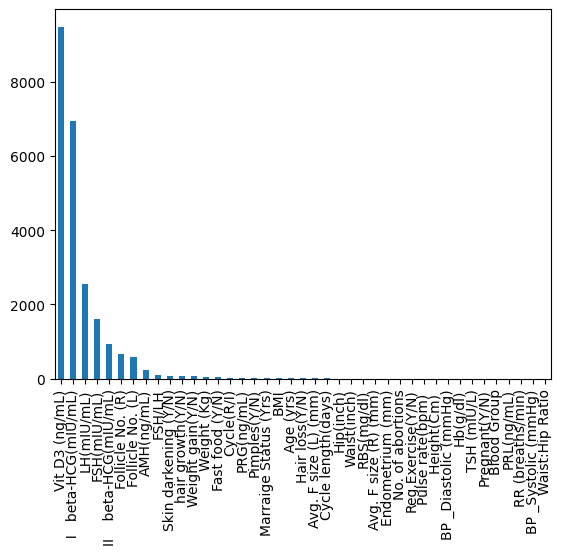

In [ ]:
#p 0, high importance
chi_values = pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [ ]:
chi_values

Vit D3 (ng/mL)            9477.648952
  I   beta-HCG(mIU/mL)    6950.525631
LH(mIU/mL)                2558.471157
FSH(mIU/mL)               1601.145511
II    beta-HCG(mIU/mL)     949.362075
Follicle No. (R)           672.789402
Follicle No. (L)           573.647927
AMH(ng/mL)                 232.516618
FSH/LH                      96.831682
Skin darkening (Y/N)        84.870716
hair growth(Y/N)            84.854623
Weight gain(Y/N)            65.554147
Weight (Kg)                 49.466423
Fast food (Y/N)             37.721883
Cycle(R/I)                  27.681419
PRG(ng/mL)                  24.638020
Pimples(Y/N)                22.587803
Marraige Status (Yrs)       20.561562
BMI                         14.568227
 Age (yrs)                  14.284370
Hair loss(Y/N)               8.846546
Avg. F size (L) (mm)         8.090830
Cycle length(days)           7.750342
Hip(inch)                    5.894434
Waist(inch)                  5.593108
RBS(mg/dl)                   4.459089
Avg. F size 

# **EXTRA TREE CLASSIFIER**

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
imp = pd.Series(model.feature_importances_,index=x.columns)
imp.sort_values(ascending=False,inplace=True)
imp

Follicle No. (R)          0.127905
Skin darkening (Y/N)      0.085060
hair growth(Y/N)          0.084653
Follicle No. (L)          0.083998
Weight gain(Y/N)          0.072980
Cycle(R/I)                0.052768
Fast food (Y/N)           0.038143
Pimples(Y/N)              0.029610
Cycle length(days)        0.020877
AMH(ng/mL)                0.018191
LH(mIU/mL)                0.016970
Avg. F size (L) (mm)      0.016578
Hip(inch)                 0.016539
 Age (yrs)                0.016178
Avg. F size (R) (mm)      0.016166
Height(Cm)                0.014694
Reg.Exercise(Y/N)         0.014568
Hair loss(Y/N)            0.014361
Weight (Kg)               0.013949
Marraige Status (Yrs)     0.013807
Waist(inch)               0.013578
Waist:Hip Ratio           0.013070
Endometrium (mm)          0.012715
  I   beta-HCG(mIU/mL)    0.012658
RR (breaths/min)          0.012467
TSH (mIU/L)               0.012306
Hb(g/dl)                  0.012289
Pulse rate(bpm)           0.012171
PRL(ng/mL)          

<Axes: >

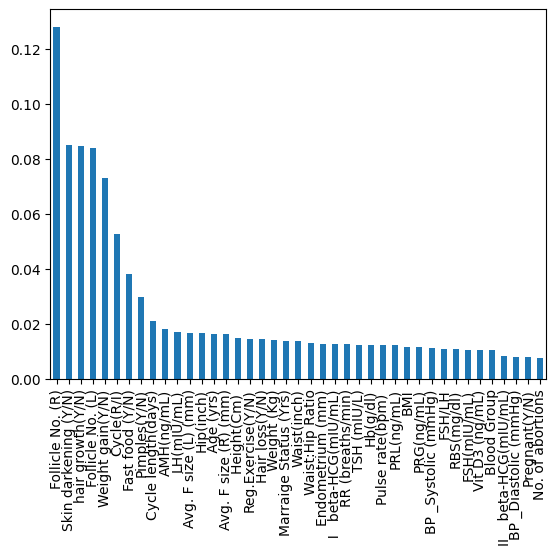

In [ ]:
imp.plot.bar()

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [ ]:
ytest

499    0
486    1
65     0
41     0
326    0
      ..
347    0
441    0
328    1
364    0
443    1
Name: PCOS (Y/N), Length: 136, dtype: int64

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9117647058823529


In [ ]:
#top12 serially chi2 93.3%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC12 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC12)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.9044117647058824
Precision: 0.8974358974358975
Recall: 0.7954545454545454
F1 Score: 0.8433734939759037


In [ ]:
#top12 serially extra tree 91%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)', 'hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE12 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE12)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.9117647058823529
Precision: 0.9
Recall: 0.8181818181818182
F1 Score: 0.8571428571428572


In [ ]:
x1 = ["Pre_C", "Pre_E", "Acc_C", "Acc_E", "Rec_C", "Rec_E", "F1S_C", "F1S_E"]
y1 = [preC, preE, accuracyC12, accuracyE12, reC, reE, fscoreC, fscoreE]
# Define colors for each bar
colors = ['#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347']
plt.bar(x1, y1, color=colors)
plt.show()

NameError: ignored

In [ ]:
#top5 serially chi2 76%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC5 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC5)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.7647058823529411
Precision: 0.6304347826086957
Recall: 0.6590909090909091
F1 Score: 0.6444444444444444


In [ ]:
#top5 serially extra tree 84%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE5 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE5)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8455882352941176
Precision: 0.7555555555555555
Recall: 0.7727272727272727
F1 Score: 0.7640449438202247


In [ ]:
#top10 without ultra sound serially chi2 85%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC10 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC10)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.8529411764705882
Precision: 0.7608695652173914
Recall: 0.7954545454545454
F1 Score: 0.7777777777777778


In [ ]:
#top10 serially extra tree 84%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Hip(inch)','Marraige Status (Yrs)','Waist:Hip Ratio']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
rf.fit(t5xtrain, t5ytrain)
t5y_pred = rf.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE10 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE10)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8455882352941176
Precision: 0.7674418604651163
Recall: 0.75
F1 Score: 0.7586206896551724


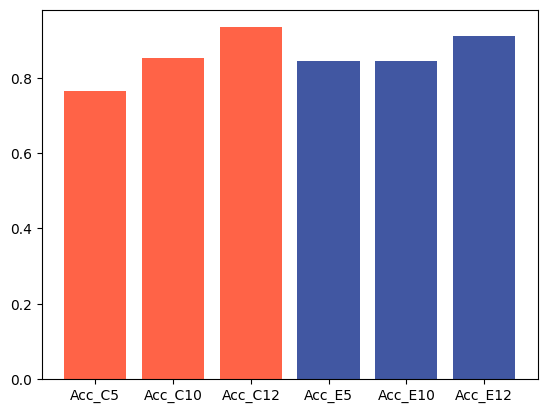

In [ ]:
x1 = ["Acc_C5", "Acc_C10", "Acc_C12","Acc_E5","Acc_E10", "Acc_E12"]
y1 = [accuracyC5,accuracyC10,accuracyC12, accuracyE5, accuracyE10, accuracyE12]
# Define colors for each bar
colors = ['#FF6347', '#FF6347', '#FF6347', '#4157A2', '#4157A2', '#4157A2']
plt.bar(x1, y1, color=colors)
plt.show()

# **ADABOOSTClassifier**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
AdaModel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=AdaModel.fit(xtrain, ytrain)
ypred=model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest,ypred))

Accuracy: 0.8529411764705882


In [ ]:
#top12 serially extra tree 89%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)', 'hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8970588235294118
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1 Score: 0.8292682926829269


In [ ]:
#top12 serially chi2 91%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.9117647058823529
Precision: 0.8809523809523809
Recall: 0.8409090909090909
F1 Score: 0.8604651162790699


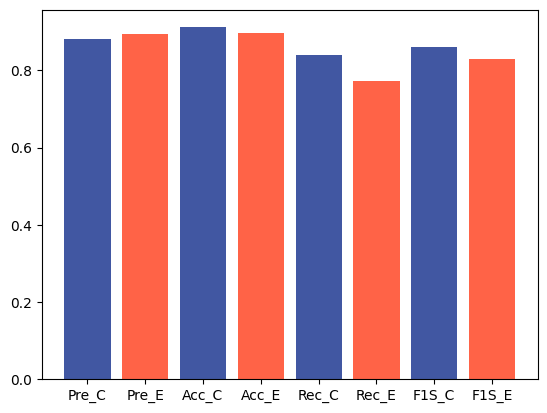

In [ ]:
x1 = ["Pre_C", "Pre_E", "Acc_C", "Acc_E", "Rec_C", "Rec_E", "F1S_C", "F1S_E"]
y1 = [preC, preE, accuracyC, accuracyE, reC, reE, fscoreC, fscoreE]
# Define colors for each bar
colors = ['#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347']
plt.bar(x1, y1, color=colors)
plt.show()

In [ ]:
#top5 serially chi2 82%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.8235294117647058
Precision: 0.7272727272727273
Recall: 0.7272727272727273
F1 Score: 0.7272727272727273


In [ ]:
#top5 serially extra tree 86%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8602941176470589
Precision: 0.7906976744186046
Recall: 0.7727272727272727
F1 Score: 0.7816091954022988


In [ ]:
#top10 serially chi2 81%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)

Accuracy: 0.8161764705882353
Precision: 0.7209302325581395
Recall: 0.7045454545454546
F1 Score: 0.7126436781609196


In [ ]:
#top10 serially extra tree 80%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)','Waist:Hip Ratio']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8088235294117647
Precision: 0.7045454545454546
Recall: 0.7045454545454546
F1 Score: 0.7045454545454546


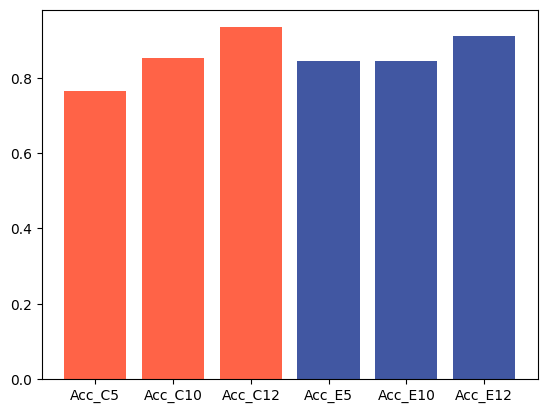

In [ ]:
x1 = ["Acc_C5", "Acc_C10", "Acc_C12","Acc_E5","Acc_E10", "Acc_E12"]
y1 = [accuracyC5,accuracyC10,accuracyC12, accuracyE5, accuracyE10, accuracyE12]
# Define colors for each bar
colors = ['#FF6347', '#FF6347', '#FF6347', '#4157A2', '#4157A2', '#4157A2']
plt.bar(x1, y1, color=colors)
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1=SVC(kernel='linear')
model1.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
model1.score(xtest,ytest)

0.8455882352941176

In [ ]:
#top12 serially chi2 92.6%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)


Accuracy: 0.9264705882352942
Precision: 0.9473684210526315
Recall: 0.8181818181818182
F1 Score: 0.8780487804878049


In [ ]:
#top12 serially extra tree 90%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)', 'hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model1.fit(t5xtrain, t5ytrain)
t5y_pred = model1.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)


Accuracy: 0.9044117647058824
Precision: 0.8974358974358975
Recall: 0.7954545454545454
F1 Score: 0.8433734939759037


In [ ]:
#top5 serially chi2 82.3%
t5columnsl =['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model1.fit(t5xtrain, t5ytrain)
t5y_pred = model1.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)


Accuracy: 0.8235294117647058
Precision: 0.7272727272727273
Recall: 0.7272727272727273
F1 Score: 0.7272727272727273


In [ ]:
#top5 serially extra tree 82.3%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model1.fit(t5xtrain, t5ytrain)
t5y_pred = model1.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)

Accuracy: 0.8235294117647058
Precision: 0.7631578947368421
Recall: 0.6590909090909091
F1 Score: 0.7073170731707317


In [ ]:
#top10 serially chi2 84.5%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model.fit(t5xtrain, t5ytrain)
t5y_pred = model.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)


Accuracy: 0.8455882352941176
Precision: 0.7446808510638298
Recall: 0.7954545454545454
F1 Score: 0.7692307692307692


In [ ]:
#top10 serially extra tree 84.5%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)','Waist:Hip Ratio']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
model1.fit(t5xtrain, t5ytrain)
t5y_pred = model1.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)


Accuracy: 0.8455882352941176
Precision: 0.7555555555555555
Recall: 0.7727272727272727
F1 Score: 0.7640449438202247


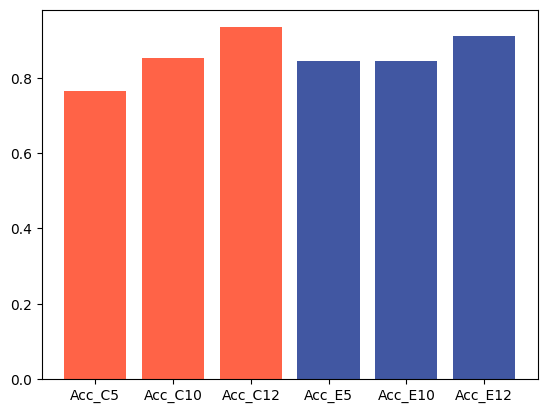

In [ ]:
x1 = ["Acc_C5", "Acc_C10", "Acc_C12","Acc_E5","Acc_E10", "Acc_E12"]
y1 = [accuracyC5,accuracyC10,accuracyC12, accuracyE5, accuracyE10, accuracyE12]
# Define colors for each bar
colors = ['#FF6347', '#FF6347', '#FF6347', '#4157A2', '#4157A2', '#4157A2']
plt.bar(x1, y1, color=colors)
plt.show()

#Gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.75, max_features=2, max_depth=3, random_state=0)
gb_clf2.fit(xtrain, ytrain)
ypred=gb_clf2.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest,ypred))

Accuracy: 0.8602941176470589


In [ ]:
#top12 serially chi2 89%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC12= accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC12)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)



Accuracy: 0.8970588235294118
Precision: 0.875
Recall: 0.7954545454545454
F1 Score: 0.8333333333333334


In [ ]:
#top12 serially extra tree 84%
t5columnsl = ['Follicle No. (R)','Follicle No. (L)', 'hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE12 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE12)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)



Accuracy: 0.8455882352941176
Precision: 0.8108108108108109
Recall: 0.6818181818181818
F1 Score: 0.7407407407407407


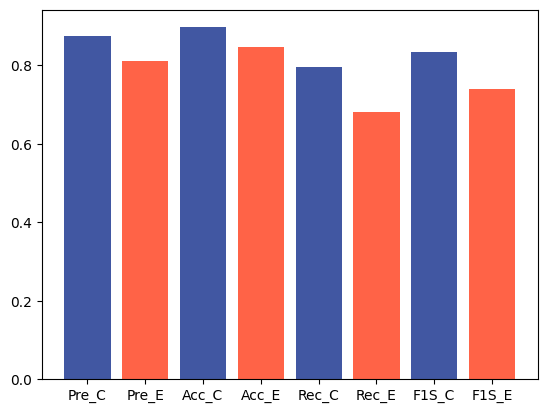

In [ ]:
x1 = ["Pre_C", "Pre_E", "Acc_C", "Acc_E", "Rec_C", "Rec_E", "F1S_C", "F1S_E"]
y1 = [preC, preE, accuracyC, accuracyE, reC, reE, fscoreC, fscoreE]
# Define colors for each bar
colors = ['#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347', '#4157A2', '#FF6347']
plt.bar(x1, y1, color=colors)
plt.show()

In [ ]:
#top5 serially chi2 76%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC5= accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC5)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)



Accuracy: 0.7647058823529411
Precision: 0.6363636363636364
Recall: 0.6363636363636364
F1 Score: 0.6363636363636364


In [ ]:
#top5 serially extra tree 83%
t5columnsl = ['hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE5 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE5)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)



Accuracy: 0.8382352941176471
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [ ]:
#top10 serially chi2 79%
t5columnsl = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Weight (Kg)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Marraige Status (Yrs)',
' Age (yrs)','BMI']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preC=precision_score(ytest,t5y_pred)
reC=recall_score(ytest,t5y_pred)
fscoreC=f1_score(ytest,t5y_pred)
accuracyC10= accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyC10)
print("Precision:",preC)
print("Recall:",reC)
print("F1 Score:",fscoreC)



Accuracy: 0.7941176470588235
Precision: 0.6739130434782609
Recall: 0.7045454545454546
F1 Score: 0.688888888888889


In [ ]:
#top10 serially extra tree 85%
t5columnsl = [ 'hair growth(Y/N)','Skin darkening (Y/N)', 'Weight gain(Y/N)','Cycle(R/I)', 'Fast food (Y/N)','Pimples(Y/N)', 'Cycle length(days)','Avg. F size (L) (mm)',
'Hip(inch)','Marraige Status (Yrs)','Waist:Hip Ratio']
t5data = df[t5columnsl]

t5xtrain,t5xtest,t5ytrain,t5ytest = train_test_split(t5data,y,test_size=.25,random_state=1)
gb_clf2.fit(t5xtrain, t5ytrain)
t5y_pred = gb_clf2.predict(t5xtest)
preE=precision_score(ytest,t5y_pred)
reE=recall_score(ytest,t5y_pred)
fscoreE=f1_score(ytest,t5y_pred)
accuracyE10 = accuracy_score(t5ytest, t5y_pred)
print("Accuracy:", accuracyE10)
print("Precision:",preE)
print("Recall:",reE)
print("F1 Score:",fscoreE)



Accuracy: 0.8529411764705882
Precision: 0.8
Recall: 0.7272727272727273
F1 Score: 0.761904761904762


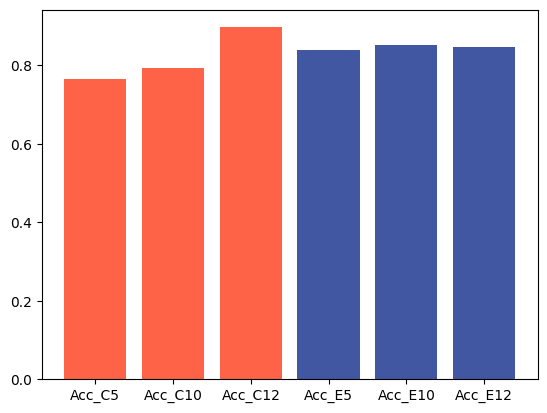

In [ ]:
x1 = ["Acc_C5", "Acc_C10", "Acc_C12","Acc_E5","Acc_E10", "Acc_E12"]
y1 = [accuracyC5,accuracyC10,accuracyC12, accuracyE5, accuracyE10, accuracyE12]
# Define colors for each bar
colors = ['#FF6347', '#FF6347', '#FF6347', '#4157A2', '#4157A2', '#4157A2']
plt.bar(x1, y1, color=colors)
plt.show()